In [ ]:
!pip install haystack-ai


**Importing Necessary Libraries:**

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from math import sqrt
import itertools
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

from haystack import Document
from haystack.components.preprocessors.text_cleaner import TextCleaner

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv('/content/a/austinHousingData.csv')

In [ ]:
df.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [ ]:
df.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,6.733043,2019.078241,30.640432,0.012985,3.474722,1.710105,0.663371,0.466878,0.002768,0.208490,0.018852,1.190840e+05,2208.323314,0.940676,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,3.146760,0.813941,21.175174,0.179438,1.893351,0.788641,0.983779,0.824481,0.061771,0.488331,0.206775,1.225272e+07,1378.576119,0.236516,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,300.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03,1483.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.276000e+03,1975.000000,1.000000,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,39.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000,8.000000,12.000000,6.000000,8.000000,6.000000,2.000000,4.000000,8.000000,1.508483e+09,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [ ]:
df = df.drop(columns=['homeImage'])
#Dropping homeImage for only numerical and string data to be proceeded

In [ ]:
df.rename(columns={'latestPrice':'price'}, inplace=True)

**EDA**

**Correlation check**

In [ ]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

Not much visible correlations with price, so we will work with data to make it more insightful

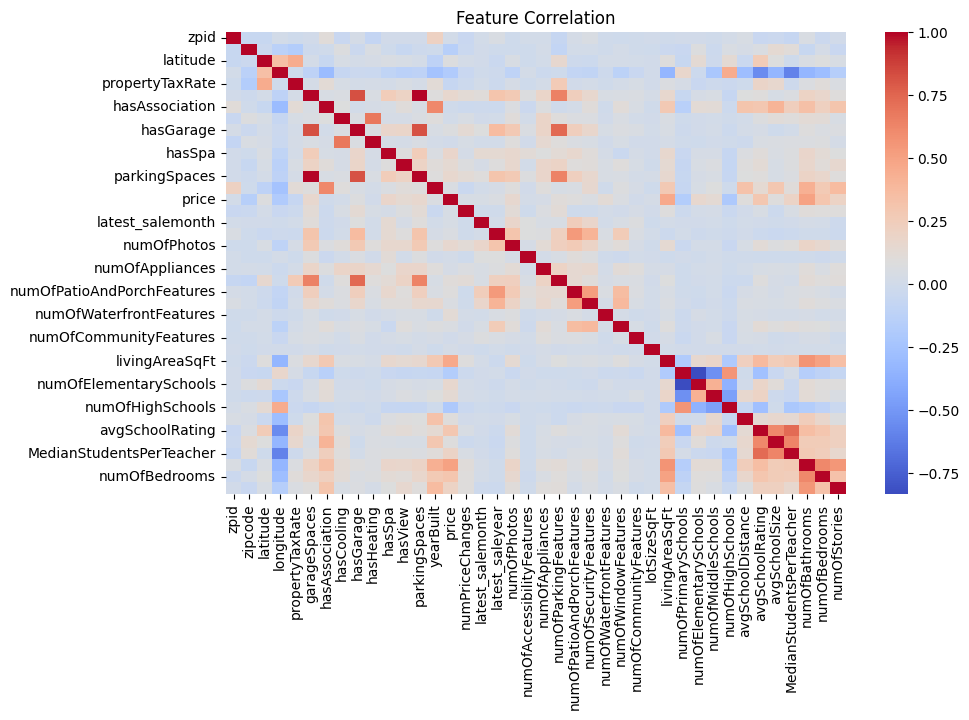

In [ ]:
data_numeric = df[num_cols]
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

**Missing data check**

In [ ]:
missing_values = df.isnull()
df_cleaned = df[~missing_values.any(axis=1)]
if missing_values.any().any():
    print("Missing values found:")
    print(df[missing_values.any(axis=1)])
else:
    print("No missing values found.")

Missing values found:
           zpid    city      streetAddress  zipcode description   latitude  \
13491  58316504  austin   6617 Back Bay Ln    78739         NaN  30.189535   
14310  29348314  austin  5842 Westslope Dr    78731         NaN  30.345671   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
13491 -97.897896             1.98             2            True        True   
14310 -97.784264             1.98             2            True        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
13491       True        True   False    False  Single Family              2   
14310       True        True    True     True  Single Family              2   

       yearBuilt      price  numPriceChanges latest_saledate  \
13491       2002   550000.0                2      2019-07-17   
14310       1984  1995000.0                3      2019-03-14   

       latest_salemonth  latest_saleyear latestPriceSource  numOfPhotos  \

In [ ]:
df = df.dropna()

the only two rows with no description was dropped

**REMOVING OUTLIERS**

Plotting price/feature to detect outliers

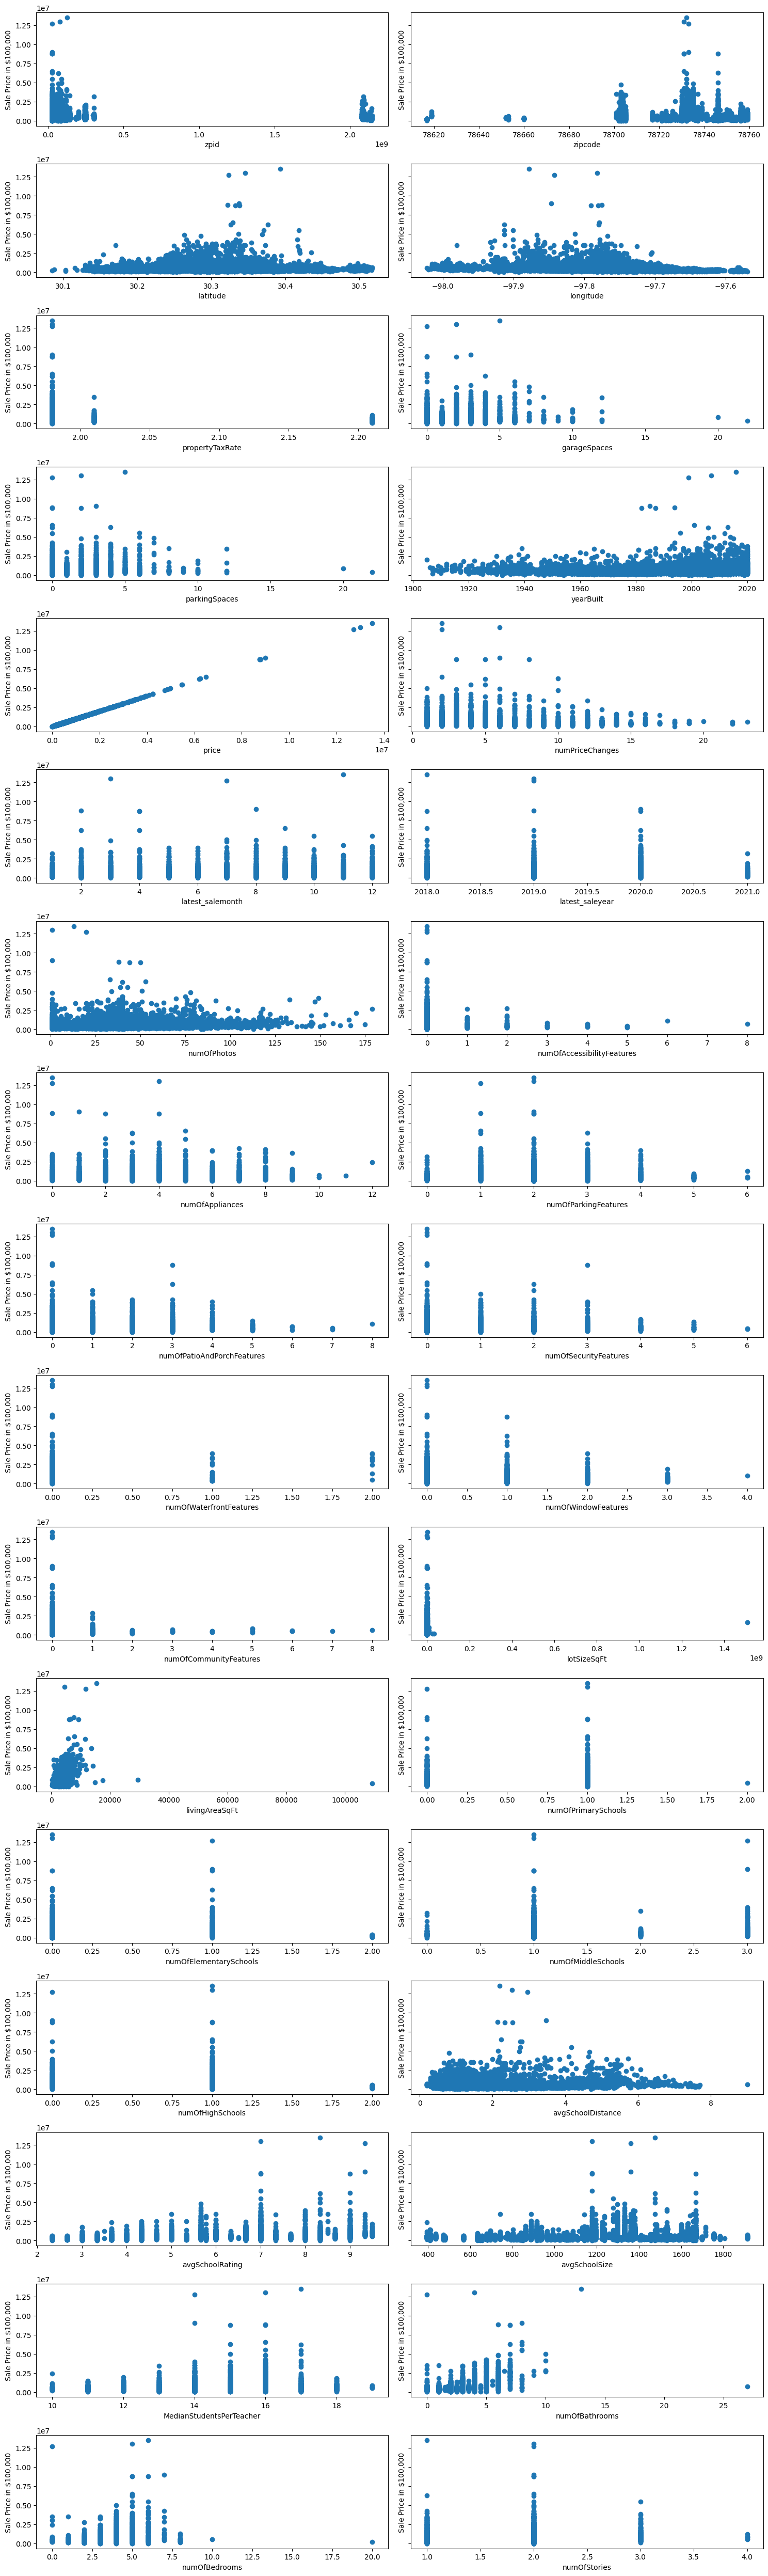

In [ ]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(num_features)//2, ncols=2, figsize=(15,50), sharey=True)

for ax, column in zip(axes.flatten(), num_features):
    ax.scatter(df[column], df['price'], label=column)
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [ ]:
df.sort_values('livingAreaSqFt', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
705,70330356,austin,201 Marly Way,78733,Level building site with great canyon views an...,30.323517,-97.861473,1.98,0,True,True,False,True,False,False,Single Family,0,2012,385000.0,2,2018-11-12,11,2018,Agent Provided,1,0,0,1,0,0,0,0,0,109335.6,109292.0,0,1,3,0,3.233333,8.000000,1373,14,0.0,5,2
2557,64523076,austin,9704 Saugus Ln,78733,"New Construction, EANES Schools, 4bed 3 bath, ...",30.345898,-97.859985,1.98,0,True,True,False,True,False,False,Single Family,0,2018,829000.0,1,2018-03-08,3,2018,Agent Provided,1,0,1,1,0,0,0,0,0,103237.2,29440.0,0,1,3,0,4.300000,8.000000,1373,14,0.0,1,2
10588,29476730,austin,3303 Garden Villa Ln,78704,"3303 Garden Villa Ln, Austin, TX 78704 is a va...",30.234896,-97.770287,1.98,2,False,False,True,True,False,False,Vacant Land,2,2017,770000.0,1,2018-10-22,10,2018,Agent Provided,1,0,0,4,0,0,0,0,0,17424.0,17536.0,1,0,1,1,1.166667,3.666667,861,12,0.0,6,2
2316,125904370,austin,12400 Cedar St,78732,12400 Cedar Street - Villa Del Lago is a uniqu...,30.392859,-97.877609,1.98,5,False,True,True,True,False,True,Single Family,5,2016,13500000.0,2,2018-11-28,11,2018,Agent Provided,13,0,0,2,0,0,0,0,0,710899.2,15394.0,1,0,1,1,2.200000,8.333333,1476,17,13.0,6,1
14257,29344391,austin,5102 Beverly Skyline,78731,Large lot near Highland Park Elementary in the...,30.335943,-97.765388,1.98,0,False,True,False,True,False,False,Vacant Land,0,1975,535000.0,2,2020-04-21,4,2020,Broker Provided,11,0,0,2,0,0,0,0,0,13939.2,14962.0,1,0,1,1,1.466667,7.000000,1177,16,0.0,3,2


In [ ]:
df.drop(index=[705, 2557], inplace=True)

In [ ]:
df.sort_values('lotSizeSqFt', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
14654,58297775,austin,3200 W 35th St,78703,Fabulous 4 Bed 4 Bath house on one of the larg...,30.314316,-97.768044,1.98,5,False,True,True,True,False,False,Single Family,5,1955,1650000.0,3,2020-02-20,2,2020,Broker Provided,23,0,8,2,2,1,0,0,0,1.508483e+09,3328.0,1,0,1,1,1.633333,7.000000,1298,16,4.0,4,2
9244,62605548,austin,706 W 22nd St APT 306,78705,Leased for $1695 though 7/31/2020 - Unique gat...,30.285631,-97.745697,1.98,0,True,True,False,True,False,False,Condo,0,1982,179900.0,7,2019-10-15,10,2019,Agent Provided,16,0,4,0,0,0,0,0,0,3.415452e+07,728.0,1,0,1,1,1.533333,6.000000,1196,16,1.0,2,1
11116,145652991,austin,4319 Nitschke St,78723,**Subject to City of Austin SMART Housing and ...,30.294910,-97.698997,1.98,1,True,True,True,True,False,False,Townhouse,1,2016,187471.0,1,2020-06-29,6,2020,Agent Provided,26,0,3,2,0,1,0,1,0,2.617956e+07,815.0,1,0,1,1,2.166667,5.000000,966,15,2.0,2,2
2340,124837778,austin,4304 Front Range Ln,78732,"4304 Front Range Ln, Austin, TX 78732 is a sin...",30.380476,-97.881027,1.98,2,True,True,True,True,False,True,Single Family,2,2014,569000.0,1,2019-03-29,3,2019,Agent Provided,33,0,4,2,0,0,0,0,0,8.712000e+06,3183.0,1,0,1,1,1.833333,8.333333,1476,17,3.0,4,2
4635,202157510,austin,201 Charismatic Pl,78737,"201 Charismatic Pl, Austin, TX 78737 is a sing...",30.205276,-98.011406,2.01,3,True,True,True,True,True,False,Single Family,3,2015,999500.0,3,2019-11-08,11,2019,Broker Provided,1,0,4,2,0,0,0,0,0,8.581320e+06,4459.0,1,0,1,1,5.533333,6.666667,1132,16,6.0,5,2


In [ ]:
df.drop(index=[14654], inplace=True)

In [ ]:
df.sort_values('numOfBathrooms', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
2838,111972888,austin,4212 Far West Blvd,78731,Well-maintained home in highly desirable North...,30.361406,-97.769707,1.98,2,False,True,True,True,False,False,Single Family,2,1967,745000.0,1,2020-10-20,10,2020,Agent Provided,46,0,4,2,0,0,0,0,0,10236.0,2137.0,1,0,1,1,0.933333,7.000000,1483,16,27.0,4,1
2316,125904370,austin,12400 Cedar St,78732,12400 Cedar Street - Villa Del Lago is a uniqu...,30.392859,-97.877609,1.98,5,False,True,True,True,False,True,Single Family,5,2016,13500000.0,2,2018-11-28,11,2018,Agent Provided,13,0,0,2,0,0,0,0,0,710899.2,15394.0,1,0,1,1,2.200000,8.333333,1476,17,13.0,6,1
184,124843021,austin,13115 Perryton Dr,78732,This highly custom home sits on a well-establi...,30.338959,-97.926979,1.98,4,True,True,True,True,True,True,Single Family,4,2014,4100000.0,3,2020-12-23,12,2020,Broker Provided,149,0,8,3,0,0,0,0,0,172497.6,9866.0,1,0,1,1,3.433333,8.333333,1533,17,10.0,6,2
375,89551873,austin,14800 Flat Top Ranch Rd,78732,GRACIOUS LUXURY ON LAKE AUSTIN\r\nThis award-w...,30.368996,-97.912720,1.98,6,True,True,True,True,True,True,Single Family,6,2014,4950000.0,6,2018-08-17,8,2018,Agent Provided,34,0,3,2,0,0,0,0,0,116740.8,13731.0,1,0,1,1,2.733333,8.333333,1476,17,10.0,5,2
613,96645484,austin,9113 Camelback Dr,78733,"Sweeping views abound from this 10,802-square-...",30.331038,-97.855659,1.98,3,True,True,True,True,False,False,Single Family,3,2007,2750000.0,7,2018-05-02,5,2018,Agent Provided,40,0,1,3,0,0,0,0,0,43560.0,10611.0,0,1,3,0,3.500000,8.000000,1373,14,10.0,6,2


In [ ]:
df.drop(index=[2838], inplace=True)

In [ ]:
df.sort_values('numOfBedrooms', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
8597,2094498207,austin,4902 Duval Rd R2 #R2,78727,"Lovely convenient condo, with a private wooded...",30.415489,-97.737213,1.98,0,True,True,False,True,False,True,Condo,0,1985,174900.0,2,2020-11-13,11,2020,Agent Provided,25,0,4,1,0,0,0,0,0,5227.0,916.0,1,0,1,1,2.400000,6.000000,1474,15,2.0,20,1
5103,29493821,austin,3311 Dalton St,78745,"3311 Dalton St, Austin, TX 78745 is a multi fa...",30.201666,-97.834198,1.98,0,False,True,False,True,False,False,Multiple Occupancy,0,1994,525000.0,1,2020-06-23,6,2020,Agent Provided,37,0,0,2,0,0,0,0,0,12632.4,3725.0,1,0,1,1,1.166667,4.666667,887,14,7.0,10,2
13071,58312709,austin,2712 Windswept Cv,78745,Renovated 4Plex!! This property sits in the We...,30.230247,-97.802513,1.98,8,False,True,True,True,False,False,Multiple Occupancy,8,1972,260000.0,6,2019-02-27,2,2019,Broker Provided,1,0,1,3,0,0,0,0,0,6969.0,3344.0,1,0,1,1,1.200000,4.666667,890,14,4.0,8,2
14530,29397489,austin,705 Harris Ave,78705,*Pre-Lease Aug 2021* New construction AMAZIING...,30.294716,-97.729362,1.98,0,True,True,False,True,False,False,Apartment,0,2019,1299000.0,6,2019-09-22,9,2019,Moreland Properties,55,0,2,2,0,0,0,0,0,7405.0,5400.0,1,0,1,1,1.266667,7.333333,1142,15,5.0,8,2
11888,29419406,austin,8204 Sam Rayburn Dr,78753,Great opportunity for multi-family investment!...,30.346745,-97.700157,1.98,0,False,True,False,True,False,False,Multiple Occupancy,0,1971,139777.0,5,2019-03-25,3,2019,Agent Provided,8,0,0,0,0,0,0,0,0,10018.0,3382.0,1,0,1,1,1.000000,3.333333,832,13,4.0,8,1


In [ ]:
df.drop(index=[8597], inplace=True)

In [ ]:
df.sort_values('avgSchoolDistance', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
1546,202169287,driftwood,807 Sad Willow Pass,78619,This coveted Montana floor plan has a dream k...,30.140291,-97.973015,2.01,3,True,True,True,True,False,True,Single Family,3,2015,624800.0,3,2019-01-16,1,2019,Agent Provided,28,0,3,2,0,0,0,0,0,51836.4,3682.0,1,0,2,0,9.000000,6.000000,740,15,4.0,4,1
4570,28601137,austin,11408 Oak Branch Dr,78737,MULTIPLE OFFERS! Close proximity to restaurant...,30.215536,-97.976852,2.01,2,True,True,True,True,False,False,Single Family,2,1993,520000.0,4,2020-07-10,7,2020,Broker Provided,39,0,3,2,1,0,0,0,0,75358.8,2662.0,1,0,1,1,7.700000,6.666667,1132,16,3.0,3,1
4600,119628591,austin,301 Stone View Trl,78737,"301 Stone View Trl, Austin, TX 78737 is a sing...",30.211395,-97.977341,2.01,0,True,False,False,False,False,True,Single Family,0,2012,370000.0,1,2018-05-16,5,2018,Agent Provided,1,0,0,1,0,0,0,0,0,1516323.6,2484.0,1,0,1,1,7.666667,6.666667,1132,16,3.0,4,1
4544,122186710,austin,281 Stone View Trl,78737,"Adorable, Pottery Barn style home in Ledge Sto...",30.210518,-97.977348,2.01,0,True,True,False,True,False,False,Single Family,0,2013,334900.0,1,2019-09-13,9,2019,Broker Provided,28,0,0,1,0,0,0,0,0,6534.0,2084.0,1,0,1,1,7.666667,6.666667,1132,16,3.0,3,1
4471,96622854,austin,360 Stone View Trl,78737,Gorgeous/Well maintained home across from Belt...,30.211603,-97.977440,2.01,0,True,True,False,True,False,True,Single Family,0,2009,357000.0,3,2020-02-18,2,2020,Agent Provided,19,0,3,1,0,0,0,1,0,14810.4,2240.0,1,0,1,1,7.666667,6.666667,1132,16,2.0,4,1


In [ ]:
df.drop(index=[4471], inplace=True)

Also removing outliers with IQR function.
This function detects outliers in a given numerical data column using the Interquartile Range (IQR) method. It calculates the lower and upper bounds based on the IQR, and identifies values in the dataset that fall outside these bounds. Outliers are those values that are significantly higher or lower than the rest of the data.

In [ ]:
def iqr_outliers(column):
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.6 * iqr)
    upper_range = Q3 + (1.6 * iqr)
    return lower_range,upper_range

In [ ]:
lotlower,lotupper = iqr_outliers(df.lotSizeSqFt)
sqftlower, sqftupper = iqr_outliers(df.livingAreaSqFt)

df.drop(df[ (df.lotSizeSqFt > lotupper) | (df.lotSizeSqFt < lotlower) ].index , inplace=True)
df.drop(df[ (df.livingAreaSqFt > sqftupper) | (df.livingAreaSqFt < sqftlower) ].index , inplace=True)

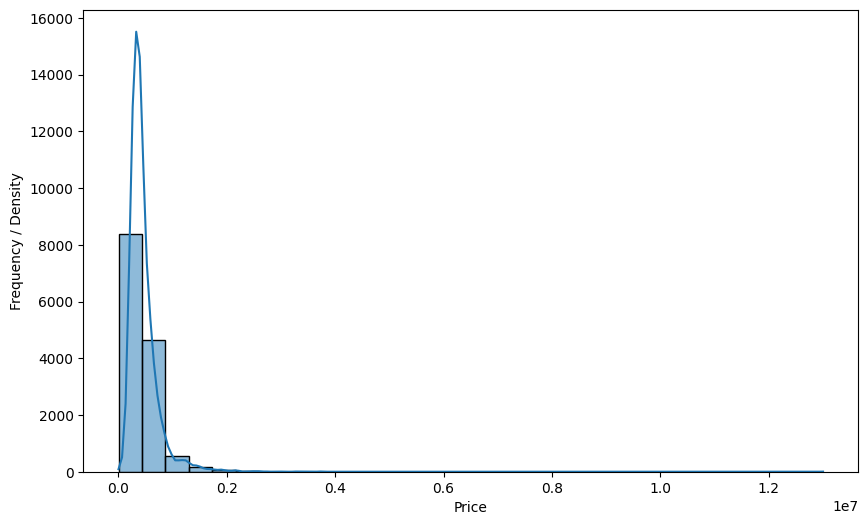

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency / Density')
plt.show()

In [ ]:
df.sort_values('price', ascending=False).head(10)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
14275,80097372,austin,5909 Lookout Mountain Dr,78731,"5909 Lookout Mountain Dr, Austin, TX 78731 is ...",30.345404,-97.781227,1.98,2,True,True,True,True,False,False,Single Family,2,2007,13000000.0,6,2019-03-26,3,2019,Broker Provided,1,0,4,2,0,0,0,0,0,10454.0,4441.0,1,0,1,1,2.533333,7.000000,1177,16,4.0,5,2
14305,29337365,austin,2300 Bonita St,78703,New Tarrytown modern A frame farmhouse on quie...,30.300785,-97.761139,1.98,2,False,True,True,True,True,False,Single Family,2,2020,3750000.0,3,2020-09-23,9,2020,"Austin Boutique Realty, LLC",92,0,4,2,3,2,0,1,0,8829.0,3885.0,1,0,1,1,1.100000,7.000000,1298,16,5.0,6,2
12818,29333800,austin,1906 Bremen St,78703,New Home by Vinson Radke Homes. A true modern...,30.292486,-97.765007,1.98,4,False,True,True,True,False,True,Single Family,4,2019,3725000.0,2,2020-04-30,4,2020,Kuper Sotheby's Itl Rlty,81,0,8,3,1,1,0,1,0,8102.0,4103.0,1,0,1,1,0.900000,7.000000,1298,16,5.0,4,3
454,29348387,austin,4819 N Capital Of Tx Hy #1,78746,Stunning California-style home on the shores o...,30.346008,-97.799713,1.98,2,True,True,True,True,False,False,Condo,2,1997,3495000.0,4,2020-05-06,5,2020,Agent Provided,63,0,5,2,0,0,0,0,0,11325.6,4496.0,0,1,1,0,2.500000,9.000000,1669,15,4.0,3,2
1417,29343531,austin,2804 Rivercrest Dr,78746,Small Mid-Century House could be updated to Fa...,30.331615,-97.821777,1.98,2,True,True,True,True,False,False,Single Family,2,1965,3395000.0,3,2020-08-28,8,2020,Agent Provided,14,0,1,2,1,0,1,0,0,13503.6,1826.0,0,1,1,0,2.300000,9.000000,1669,15,3.0,3,1
14290,29337899,austin,2409 Westlake Dr,78746,Aspire on Lake Austin floats on the waterfront...,30.304258,-97.782433,1.98,0,True,True,False,True,False,True,Condo,0,1981,3300000.0,3,2020-02-25,2,2020,Agent Provided,49,0,0,1,0,0,0,0,0,4342.0,3211.0,0,1,1,0,2.650000,9.000000,1669,15,3.0,3,2
14575,29335997,austin,3213 Stevenson Ave,78703,"3213 Stevenson Ave, Austin, TX 78703 is a sing...",30.297523,-97.774040,1.98,0,False,True,False,True,False,False,Single Family,0,2017,3295000.0,1,2018-03-21,3,2018,Agent Provided,1,0,5,1,0,0,0,0,0,11325.6,4200.0,1,0,1,1,0.966667,7.000000,1298,16,5.0,4,2
13757,29322500,austin,1904 Paramount Ave,78704,Classic ranch style home for sale in the super...,30.253876,-97.776573,1.98,2,False,True,True,True,False,False,Single Family,2,2017,2995000.0,3,2020-11-30,11,2020,Agent Provided,47,0,1,3,0,0,0,0,0,14374.8,3302.0,0,0,0,0,1.838296,5.778694,1237,15,4.0,4,1
12949,29335225,austin,1902 Forest Trl,78703,Nalle Custom Homes latest beauty! A RARE oppor...,30.293215,-97.767975,1.98,2,False,True,True,True,True,True,Multiple Occupancy,2,2020,2925000.0,1,2020-08-06,8,2020,Agent Provided,70,0,3,2,0,0,0,0,0,9374.0,4219.0,1,0,1,1,0.833333,7.000000,1298,16,5.0,4,1
6151,29330363,austin,407 Ridgewood Rd,78746,Stunning modern to-be-built retreat complete w...,30.279837,-97.789078,1.98,2,False,True,True,True,False,False,Single Family,2,2020,2750000.0,5,2020-11-11,11,2020,Stanberry REALTORS,34,2,4,4,0,1,0,0,0,11325.6,3967.0,1,0,1,1,1.333333,6.000000,1195,16,5.0,5,1


In [ ]:
df.drop(index=[14275], inplace=True)

Too high price values also being dropped

**NLP Part 1**

In [ ]:
desc = df['description']

df.drop('description', axis=1, inplace=True)


In [ ]:
stop_words = [
    # English stop words
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't",
    "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by",
    "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't",
    "down", "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have",
    "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
    "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't",
    "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor",
    "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out",
    "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some",
    "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there",
    "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to",
    "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were",
    "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's",
    "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're",
    "you've", "your", "yours", "yourself", "yourselves",

    # Common misspellings and contractions without apostrophes
    "youre", "youll", "youd", "youve", "theyre", "theyll", "theyd", "theyve", "weve", "well", "wed",
    "thats", "whats", "heres", "theres", "wheres", "hows", "whos", "whys", "ive", "im", "id", "ill",
    "hes", "shes", "itll", "itd", "dont", "cant", "wont", "shouldnt", "wouldnt", "couldnt", "hadnt",
    "hasnt", "havent", "isnt", "arent", "werent", "wasnt", "doesnt", "didnt", "aint", "lets",
    "mustnt", "shant", "shouldve", "wouldve", "couldve", "mightve", "mustve",

    # Real estate related terms
    "bedroom", "bathroom", "br", "ba", "bed", "bath", "square", "feet", "foot", "sq", "ft", "sqft",
    "sf", "square", "footage", "property", "home", "house", "apartment", "condo", "condominium", "townhouse",
    "townhome", "unit", "listing", "mls", "real", "estate", "realty", "realtor", "agent", "broker",
    "basement", "garage", "parking", "story", "stories", "floor", "flooring", "ceiling", "wall", "kitchen",
    "living", "dining", "room", "master", "suite", "closet", "deck", "balcony", "yard", "backyard",
    "frontyard", "driveway", "amenities", "appliances", "utilities", "heating", "cooling", "central",
    "air", "stainless", "steel", "granite", "marble", "hardwood", "carpet", "tile", "laminate", "price",
    "sold", "sale", "rent", "rental", "lease", "monthly", "annually", "yearly", "mortgage", "loan",
    "down", "payment", "hoa", "association", "fee", "taxes", "tax", "assessment", "value", "appraisal",
    "inspection", "offer", "contract", "closing", "escrow", "deed", "title", "listed", "features",
    "updated", "location", "neighborhood", "community", "school", "district", "zoning",

    # Additional terms
    "austin", "tx", "pflugerville"
]

cleaner = TextCleaner(
    remove_numbers=True,
    convert_to_lowercase=True,
    remove_punctuation=True,
)


In [ ]:
def wrapper(text):
  clean_text = cleaner.run([str(text)])["texts"][0]
  keywords = []
  for i in clean_text.split(" "):
    if i not in stop_words and i != "":
      if i == "zestimate": return "empty"
      keywords.append(i)
  output = " ".join(keywords)
  return output

In [ ]:
df["words"] = desc.apply(lambda x: wrapper(x))
df["words"].head()

,words
0,empty
1,absolutely gorgeous full baths located tucked ...
2,construction estimated completion august pione...
3,absolutely darling one charming book like lake...
4,brimming appeal warm livability sleek stylish ...


**SPLITTING INTO TRAIN/TEST SETS**

In [ ]:
random_state = 2

y = pd.DataFrame(df['price'])
x = df.drop('price', axis=1,)

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=random_state)

x_train.reset_index(inplace=True)
x_train.drop('index', axis=1, inplace=True)

x_test.reset_index(inplace=True)
x_test.drop('index', axis=1, inplace=True)

y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

**NLP Part 2**

Fitting processor & Prepraing Train DF

In [ ]:
processor = TfidfVectorizer(sublinear_tf=True, use_idf=True, max_df=0.9, min_df=.005, ngram_range=(1,4), max_features=1000)
word_arr = processor.fit_transform(x_train["words"])

words = pd.DataFrame(word_arr.toarray(), columns=processor.get_feature_names_out())
words.head()

,abundance,abundance natural,abundance natural light,abundant,abundant natural,ac,accent,access,access downtown,access mopac,acclaimed,acre,acre lot,acres,across,across street,add,added,addition,additional,additional bedrooms,adorable,airport,airy,alamo,allows,almost,along,also,amazing,ample,anderson,another,appeal,apple,apple campus,arboretum,area,area large,areas,around,attached,attic,austins,available,avery,avery ranch,award,award winning,awardwinning,away,awesome,back,back patio,back porch,backing,backs,backs greenbelt,backsplash,bamboo,bar,barton,barton creek,basketball,bathrooms,baths,bay,bbq,beautiful,beautifully,beautifully remodeled,beauty,bedrooms,bedrooms bathrooms,bedrooms baths,bedrooms full,bedrooms upstairs,beds,beds baths,behind,best,big,bike,bike trails,bird,bird lake,black,blinds,block,blocks,boasts,bonus,bowie,branch,brand,brand new,breakfast,breakfast area,breakfast bar,breakfast nook,brentwood,brick,bright,bright open,bring,build,building,built,builtin,builtins,bungalow,buyer,buyers,cabinet,cabinet space,cabinetry,cabinets,call,campus,can,canyon,car,care,cared,carport,cedar,ceilings,center,center island,ceramic,character,charm,charming,check,chefs,cherry,circle,city,classic,clean,close,close downtown,close proximity,close shopping,closets,club,coffee,colors,come,come see,comes,comfortable,coming,common,commute,complete,completed,completely,completely remodeled,concept,concrete,concrete floors,condition,congress,construction,contact,contemporary,convenient,conveniently,conveniently located,converted,convey,conveys,cooktop,cool,corner,corner lot,cottage,counter,counter space,counter tops,counters,countertops,country,course,court,courts,courtyard,covered,covered back,covered back patio,covered front,covered patio,covered porch,coveted,cozy,cozy fireplace,create,creek,creek greenbelt,crestview,crown,crown molding,cul,culdesac,culdesac lot,curb,curb appeal,current,currently,custom,custom cabinetry,custom cabinets,cute,day,de,de sac,decks,dedicated,deep,dell,design,designed,designer,desirable,desired,desk,detached,detail,details,development,directly,dishwasher,distance,dog,domain,done,door,doors,double,double vanities,double vanity,downstairs,downtown,dream,drive,dryer,dt,dual,dual vanities,duplex,easily,east,easy,easy access,easy access mopac,eatin,efficiency,efficient,electric,electrical,elegant,elementary,employers,empty,en,enclosed,end,endless,energy,energy efficient,engineered,enjoy,enough,ensuite,enter,entertain,entertainers,entertaining,entertainment,entire,entrance,entry,established,etc,even,every,everything,excellent,exceptional,exemplary,expansive,extended,extensive,exterior,exterior paint,extra,extra storage,fabulous,family,fan,fans,fantastic,farmhouse,feature,featuring,feel,fence,fenced,fiber,filled,find,finish,finished,finishes,fire,fire pit,fireplace,first,fixtures,flat,flex,flex space,flexible,floorplan,floors,floors throughout,flow,formal,foundation,four,foyer,frameless,french,french doors,fresh,fresh paint,freshly,freshly painted,fridge,friendly,friends,front,front back,front door,front porch,full,full bathrooms,full baths,fully,fully remodeled,functional,game,gameroom,garden,garden tub,garden tub separate,garden tub separate shower,gas,gas cooktop,gas fireplace,gas range,gas stove,gate,gated,gem,generous,get,glass,go,golf,golf course,good,google,google fiber,gorgeous,gourmet,grand,great,great entertaining,great schools,green,green space,greenbelt,grill,grocery,guest,guests,gutters,half,hard,hardware,hardwoods,heart,heated,heater,heb,heights,high,high ceilings,high end,highend,highland,highly,highly desirable,highly sought,highways,hike,hike bike,hike bike trails,hiking,hill,hill country,hills,homes,hot,hot tub,hot water,huge,huge walkin,hvac,hvac system,hwy,ideal,ih,immaculate,improvements,include,include new,included,includes,including,incredible,indoor,info,information,inside,installed,insulation,interior,interior exterior,interior paint,investment,inviting,iron,irrigation,isd,island,jetted,j

In [ ]:
est = LinearRegression()
est.fit(words, y_train)

r = permutation_importance(est, words, y_train,n_repeats=10,random_state=random_state,n_jobs=-1)

importances = {}

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] >= 0.001:
        importances[words.columns[i]] = r.importances_mean[i]
    else:
      continue

important_words = list(importances.keys())

best_words_df = words[important_words]

best_words_df.head()

,award,zilker,de sac,garden tub separate shower,tub separate shower,empty,tub separate,award winning,garden tub separate,brand new,heights,brand,pool,designed,barton,country,tankless water,cul,walnut,pit,lake,must,natural,outdoor,fire pit,views,natural light,must see,walnut creek,steiner,great,tankless water heater,washer dryer,wine,tons natural light,new construction,heated,design,main,hill country,paint,guest,quartz,washer,detached,oak,avery,minutes,south,windows,east,exceptional,luxury,classic,chefs,urban,additional bedrooms,mckinney,contemporary,easy access,congress,finishes,curb appeal,restaurants,level,close,greenbelt,northwest,investment,tons natural,office,walkable,hills,within walking,open concept,builtins,convenient,ut,addition,quality,floors,double,low maintenance,avery ranch,efficient,walls,modern,built,media,large corner,quartz countertops,glass,builtin,new,custom,conveniently,gourmet,maintenance,flat,vanity,ceilings,covered back patio,tops,spacious,heart,range,luxurious,counters,acre,steiner ranch,original,crown molding,feature,study,golf course,barton creek,jetted tub,playground,elementary,multiple offers,etc,dryer,abundance natural,water,branch,custom cabinetry,park pool,common,set,large island,hike bike,ensuite,steps,sitting area,midcentury,courtyard,spaces,converted,isd,patio,upper,minutes away,priced,course,today
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084057,0.0,0.0,0.0,0.089416,0.0,0.0,0.0,0.0,0.0,0.0,0.141675,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.084077,0.000000,0.000000,0.0,0.0,0.0,0.14219,0.0,0.158923,0.0,0.0,0.0,0.099565,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070679,0.000000,0.0,0.0,0.0,0.0,0.096713,0.0,0.0,0.0,0.0,0.0,0.0,0.063374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072419,0.113493,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069477,0.0,0.145115,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.156950,0.122690,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.14318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.115535,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.107722,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.117178,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098765,0.130531,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.212908,0.0,0.0,0.0,0

In [ ]:
x_train = pd.concat([x_train, best_words_df], axis=1)
x_train.drop('words', axis=1, inplace=True)

Preparing Test DF

In [ ]:
word_arr_test = processor.transform(x_test["words"])

words_test = pd.DataFrame(word_arr_test.toarray(), columns=processor.get_feature_names_out())
best_words_test_df = words_test[important_words]

best_words_test_df.head()

,award,zilker,de sac,garden tub separate shower,tub separate shower,empty,tub separate,award winning,garden tub separate,brand new,heights,brand,pool,designed,barton,country,tankless water,cul,walnut,pit,lake,must,natural,outdoor,fire pit,views,natural light,must see,walnut creek,steiner,great,tankless water heater,washer dryer,wine,tons natural light,new construction,heated,design,main,hill country,paint,guest,quartz,washer,detached,oak,avery,minutes,south,windows,east,exceptional,luxury,classic,chefs,urban,additional bedrooms,mckinney,contemporary,easy access,congress,finishes,curb appeal,restaurants,level,close,greenbelt,northwest,investment,tons natural,office,walkable,hills,within walking,open concept,builtins,convenient,ut,addition,quality,floors,double,low maintenance,avery ranch,efficient,walls,modern,built,media,large corner,quartz countertops,glass,builtin,new,custom,conveniently,gourmet,maintenance,flat,vanity,ceilings,covered back patio,tops,spacious,heart,range,luxurious,counters,acre,steiner ranch,original,crown molding,feature,study,golf course,barton creek,jetted tub,playground,elementary,multiple offers,etc,dryer,abundance natural,water,branch,custom cabinetry,park pool,common,set,large island,hike bike,ensuite,steps,sitting area,midcentury,courtyard,spaces,converted,isd,patio,upper,minutes away,priced,course,today
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136456,0.000000,0.136012,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.094466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.113778,0.0,0.162199,0.0,0.0,0.0,0.120879,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.142587,0.0,0.101374,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.191241,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.151009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139948,0.0,0.0,0.126523,0.0,0.0,0.0,0.0,0.18243,0.0,0.0,0.0,0.0,0.0,0.0,0.184022,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181988,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.124083,0.000000,0.0,0.000000,0.0,0.0,0.0,0.081309,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.297848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.078841,0.0,0.138505,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.092561,0.0,0.082659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139822,0.0,0.0,0.0,0.123366,0.140161,0.0,0.117963,0.0,0.0,0.0,0.0,0.0,0.000000,0.099557,0.0,0.000000,0.0,0.0,0.0,0.105771,0.086541,0.0,0.11409,0.0,0.0,0.0,0.0,0.0,0.0,0.071386,0.0,0.000000,0.0,0.000000,0.0,0.0,0.118101,0.0,0.0,0.0,0.0,0.155721,0.0,0.0,0.104625,0.0,0.0,0.0,0.0,0.0,0.0,0.155416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000

In [ ]:
x_test = pd.concat([x_test, best_words_test_df], axis=1)
x_test.drop('words', axis=1, inplace=True)

In [ ]:
x_test.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'latitude', 'longitude',
       'propertyTaxRate', 'garageSpaces', 'hasAssociation', 'hasCooling',
       ...
       'courtyard', 'spaces', 'converted', 'isd', 'patio', 'upper',
       'minutes away', 'priced', 'course', 'today'],
      dtype='object', length=190)

**FEATURE ENGINEERING**

Grouping different types of schools into one feature

In [ ]:
x_train['numOfSchools'] = x_train['numOfPrimarySchools'] + x_train['numOfElementarySchools'] + x_train['numOfMiddleSchools'] + x_train['numOfHighSchools']

In [ ]:
x_test['numOfSchools'] = x_test['numOfPrimarySchools'] + x_test['numOfElementarySchools'] + x_test['numOfMiddleSchools'] + x_test['numOfHighSchools']

In [ ]:
x_train = x_train.drop(columns=['numOfPrimarySchools'])
x_train = x_train.drop(columns=['numOfElementarySchools'])
x_train = x_train.drop(columns=['numOfMiddleSchools'])
x_train = x_train.drop(columns=['numOfHighSchools'])

In [ ]:
x_test = x_test.drop(columns=['numOfPrimarySchools'])
x_test = x_test.drop(columns=['numOfElementarySchools'])
x_test = x_test.drop(columns=['numOfMiddleSchools'])
x_test = x_test.drop(columns=['numOfHighSchools'])


Below we use target-encoding on "zipcode", "yearBuilt", "latitude", "longitude" and "latest_salemonth" features

In [ ]:
def calc_smooth_mean(df, by, on, m, target_df):
    mean = df[on].mean()

    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    smooth = (counts * means + m * mean) / (counts + m)

    return round(target_df[by].map(smooth).fillna(mean), 0)

In [ ]:
num_of_samples = x_train.shape[0]
zip_samples = num_of_samples/x_train['zipcode'].unique().shape[0]
month_samples = num_of_samples/x_train['latest_salemonth'].unique().shape[0]

x_train['zip_smooth'] = calc_smooth_mean(x_train, 'zipcode', 'price', zip_samples, x_train)
x_train['year_smooth'] = calc_smooth_mean(x_train, 'yearBuilt', 'price', 300, x_train)
x_train['month_smooth'] = calc_smooth_mean(x_train, 'latest_salemonth', 'price', month_samples, x_train)

x_train['lat_zone'] = round(x_train['latitude'], 2)
x_train['long_zone'] = round(x_train['longitude'], 2)

lat_samples = num_of_samples/x_train['lat_zone'].unique().shape[0]
long_samples = num_of_samples/x_train['long_zone'].unique().shape[0]

x_train['lat_smooth'] = calc_smooth_mean(x_train, 'lat_zone', 'price', lat_samples, x_train)
x_train['long_smooth'] = calc_smooth_mean(x_train, 'long_zone', 'price', long_samples, x_train)
x_train['lat_long'] = round(np.sqrt(x_train['lat_smooth']) + np.sqrt(x_train['long_smooth']), 0)

In [ ]:
num_of_samples = x_test.shape[0]
zip_samples = num_of_samples / x_test['zipcode'].unique().shape[0]
month_samples = num_of_samples / x_test['latest_salemonth'].unique().shape[0]

x_test['zip_smooth'] = calc_smooth_mean(x_test, 'zipcode', 'price', zip_samples, x_test)
x_test['year_smooth'] = calc_smooth_mean(x_test, 'yearBuilt', 'price', 300, x_test)
x_test['month_smooth'] = calc_smooth_mean(x_test, 'latest_salemonth', 'price', month_samples, x_test)

x_test['lat_zone'] = round(x_test['latitude'], 2)
x_test['long_zone'] = round(x_test['longitude'], 2)

lat_samples = num_of_samples / x_test['lat_zone'].unique().shape[0]
long_samples = num_of_samples / x_test['long_zone'].unique().shape[0]

x_test['lat_smooth'] = calc_smooth_mean(x_test, 'lat_zone', 'price', lat_samples, x_test)
x_test['long_smooth'] = calc_smooth_mean(x_test, 'long_zone', 'price', long_samples, x_test)
x_test['lat_long'] = round(np.sqrt(x_test['lat_smooth']) + np.sqrt(x_test['long_smooth']), 0)


In [ ]:
x_train.drop('zipcode', axis=1, inplace=True)
x_test.drop('zipcode', axis=1, inplace=True)
x_train.drop('lat_zone', axis=1, inplace=True)
x_test.drop('lat_zone', axis=1, inplace=True)
x_train.drop('long_zone', axis=1, inplace=True)
x_test.drop('long_zone', axis=1, inplace=True)
x_train.drop('latitude', axis=1, inplace=True)
x_test.drop('latitude', axis=1, inplace=True)
x_train.drop('longitude', axis=1, inplace=True)
x_test.drop('longitude', axis=1, inplace=True)
x_train.drop('lat_smooth', axis=1, inplace=True)
x_test.drop('lat_smooth', axis=1, inplace=True)
x_train.drop('long_smooth', axis=1, inplace=True)
x_test.drop('long_smooth', axis=1, inplace=True)

In [ ]:
num_cols = x_train.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
data_numeric = x_train[num_cols]

Let's see how now our features correlated to price

In [ ]:
df_correlations = data_numeric.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_correlations.loc[df_correlations['level_0'] == 'price'].sort_values(0, ascending=False)

,level_0,level_1,0
2024,price,price,1.000000
2192,price,zip_smooth,0.654671
2195,price,lat_long,0.545860
2038,price,livingAreaSqFt,0.498273
2043,price,numOfBathrooms,0.418592
...,...,...,...
2119,price,within walking,0.001921
2080,price,tons natural light,0.001807
2157,price,crown molding,0.000705
2120,price,open concept,0.000533


much better, let's remove some features that have high correlation scores between themselves

In [ ]:
df_correlations = data_numeric.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

df_correlations.set_index(['pairs'], inplace = True)

df_correlations.rename(columns={0: "correlation"}, inplace=True)

df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

df_correlations[(df_correlations.correlation>.75) & (df_correlations.correlation<.95)]


,level_0,level_1,correlation
pairs,,,
"(washer dryer, dryer)",washer dryer,dryer,0.946321
"(dryer, washer dryer)",dryer,washer dryer,0.946321
"(latest_salemonth, month_smooth)",latest_salemonth,month_smooth,0.936244
"(month_smooth, latest_salemonth)",month_smooth,latest_salemonth,0.936244
"(fire pit, pit)",fire pit,pit,0.932561
"(pit, fire pit)",pit,fire pit,0.932561
"(dryer, washer)",dryer,washer,0.930262
"(washer, dryer)",washer,dryer,0.930262
"(tub separate shower, tub separate)",tub separate shower,tub separate,0.920687


Dropping price from our train_set and all highly corelated features

In [ ]:
x_train.drop('price', axis=1, inplace=True)
x_test.drop('price', axis=1, inplace=True)

In [ ]:
x_train.drop('hasGarage', axis=1, inplace=True)
x_test.drop('hasGarage', axis=1, inplace=True)
x_train.drop('latest_salemonth', axis=1, inplace=True)
x_test.drop('latest_salemonth', axis=1, inplace=True)
x_train.drop('latest_saledate', axis=1, inplace=True)
x_test.drop('latest_saledate', axis=1, inplace=True)


In [145]:
x_train_final = x_train.drop('streetAddress', axis=1)
x_test_final = x_test.drop('streetAddress', axis=1)

Using one-hot encoding and scaler for categorical and continuous data

In [146]:
one_hot_cat = ['MedianStudentsPerTeacher',
 'numOfBathrooms', 'numOfStories','numOfPhotos',
 'numOfSchools', 'numOfBedrooms', 'garageSpaces', 'parkingSpaces',
 'MedianStudentsPerTeacher', 'numOfParkingFeatures', 'hasSpa', 'hasView', 'city', 'homeType', 'latestPriceSource']


continuous = ['livingAreaSqFt', 'lotSizeSqFt', 'avgSchoolRating']

#Other data can be passed through without encoding or scaling

In [147]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), one_hot_cat),

        ('cont', Pipeline([
            ('scaler', StandardScaler())
        ]), continuous)
    ],
    remainder='passthrough'
)


In [148]:
model = XGBRegressor()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [149]:
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

parameters for gridsearchCV

In [158]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [159]:
x_train_final.columns

Index(['zpid', 'city', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'homeType',
       ...
       'upper', 'minutes away', 'priced', 'course', 'today', 'numOfSchools',
       'zip_smooth', 'year_smooth', 'month_smooth', 'lat_long'],
      dtype='object', length=183)

In [160]:
random_search.fit(x_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MedianStudentsPerTeacher',
                                                                                'numOfBathrooms',
                                                                                'numOfStories',
                                                                                'numOfPhotos',
                                                                                'numOfSchools',
                                                                                'numOfBedrooms',
                                                                                'garageSpaces',
                                                                                'parkingSpaces',
                                                                                'MedianStudentsPe...
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__learning_rate': [0.01, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 5, 7, 10],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [161]:
best_model = random_search.best_estimator_

In [162]:
y_pred = best_model.predict(x_test)

In [163]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nBest Parameters:", random_search.best_params_)
print("\nMean Squared Error (MSE):", mse)
print("\nRoot Mean Squared Error (RMSE):", rmse)
print("\nR-squared (R2 Score):", r2)


Best Parameters: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}

Mean Squared Error (MSE): 17524029440.0

Root Mean Squared Error (RMSE): 132378.35714345454

R-squared (R2 Score): 0.7666816711425781
